In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.base import BaseEstimator
import numpy as np

In [2]:
class EstimatorRssiBased(BaseEstimator):
    def __init__(self):
        return None

    def fit(self, x):
        return self 

    def predict(self, x):
        return [1.0]*len(x) 
    
    def decision_function(self, x, y=None):
        #x : [[rssi.a, rssi.b], [rssi.a, rssi.b], ...]
        
        window = 3
        b = np.ones(window)/window
        
        values = []
        for x in x:
            x_2d = np.reshape(x, (-1, 2))
            rssi_a = np.convolve(x_2d[:,0], b, mode='full')[2:-2]
            rssi_b = np.convolve(x_2d[:,1], b, mode='full')[2:-2]
            max_rssi = np.max(np.vstack((rssi_a, rssi_b)))
            values.append(-max_rssi) # force scorize
        return values

    def score(self, x, y=None):
        scores = self.decision_function(x)
        return sum(scores)/len(scores)

    def get_params(self, deep=True):
        return self.estimator.get_params(deep)

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter, value)
        return self

In [4]:
#import estimator_knn as knn
import sys
import notebookutil as nbu
sys.meta_path.append(nbu.NotebookFinder())
import datasets
import pandas as pd
import numpy as np

ds = datasets.load('data/raw/01_0[123]_0*_*')

path = data/raw/01_0[123]_0*_*
data/raw/01_01_02_4F実験室_XperiaZ3_カバン_裏上_正常_まっすぐ帰宅
...x................
data/raw/01_02_03_4F実験室_XperiaZ3_カバン_裏上_異常_まっすぐ外出
....................
data/raw/01_01_03_4F実験室_XperiaZ3_胸ポケット_裏上_正常_5秒後まっすぐ帰宅
....................
data/raw/01_02_02_4F実験室_XperiaZ3_ズボン_裏上_異常_まっすぐ外出
....................
data/raw/01_01_04_4F実験室_XperiaZ3_カバン_裏上_正常_5秒後まっすぐ帰宅
....................
data/raw/01_03_03_4F実験室_XperiaZ3_カバン_裏上_異常_まっすぐ帰宅
....................
data/raw/01_02_01_4F実験室_XperiaZ3_胸ポケット_裏上_異常_まっすぐ外出
....................
data/raw/01_01_01_4F実験室_XperiaZ3_胸ポケット_裏上_正常_まっすぐ帰宅
....................
data/raw/01_03_01_4F実験室_XperiaZ3_胸ポケット_裏上_異常_まっすぐ帰宅
....................
data/raw/01_03_02_4F実験室_XperiaZ3_ズボン_裏上_異常_まっすぐ帰宅
....................


In [16]:
import importlib
importlib.reload(roc_auc)

<module 'roc_auc' from 'roc_auc.ipynb'>

extracted 19 dataframes
extracted 159 dataframes


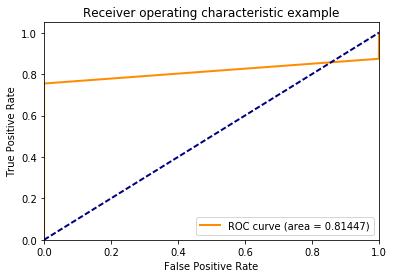

auc
0.814465408805


In [19]:
import roc_auc

def eval01():
    data_n, data_o = datasets.get_normalized_data(ds,
                                                  title_n='01_01_02.*',
                                                  #title_o ='01_02_01_4F実験室_XperiaZ3_胸ポケット_裏上_異常_まっすぐ外出',
                                                  title_o ='01_0[23]_.*', # all anomaly data from iPhone
                                                  before=6, after=0,
                                                  column=['rssi.a','rssi.b'])
    
    model = EstimatorRssiBased()
    
    data_n = [d.flatten() for d in data_n]
    data_o = [d.flatten() for d in data_o]

    model.fit(data_n)
    score_n = model.decision_function(data_n)
    score_o = model.decision_function(data_o)
    auc = roc_auc.get_auc_from_normal_outlier(score_n, score_o)
    print('auc')
    print(auc)

eval01()

In [11]:
y = np.array([[1.0,2],[2,3],[3,5],[4,0],[6,2]])
window = 3
b = np.ones(window)/window
print(y[:,0])
y[:,0] = np.convolve(y[:,0], b, mode='same')#移動平均
y

[ 1.  2.  3.  4.  6.]


array([[ 1.        ,  2.        ],
       [ 2.        ,  3.        ],
       [ 3.        ,  5.        ],
       [ 4.33333333,  0.        ],
       [ 3.33333333,  2.        ]])